In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
%matplotlib inline

In [ ]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.set(palette="pastel", color_codes=True, font_scale=2)

In [4]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments).dropna()

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild.dropna()
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




In [5]:
df_spiegel.describe()

,articles_counts,day,lesbarkeit,month,polarity,subjectivity,thread_counts,word_counts,year,mean_comment_pol,min_comment_pol,max_comment_pol,median_comment_pol,mean_comment_subj,min_comment_subj,max_comment_subj,median_comment_subj
count,625.0,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.0,625.000000,625.000000
mean,1.0,15.555200,50.216160,7.478400,0.057845,0.084441,145.793600,620.521600,2017.921600,0.085033,-0.812014,0.913965,0.042270,0.090023,0.0,0.781632,0.007137
std,0.0,7.720306,8.185391,3.277731,0.107542,0.058467,150.558364,302.175037,1.344003,0.048396,0.251083,0.158485,0.051810,0.022671,0.0,0.250356,0.020701
min,1.0,1.000000,12.200000,1.000000,-0.370000,0.000000,10.000000,57.000000,2015.000000,-0.086380,-1.000000,0.287500,-0.050000,0.005128,0.0,0.066667,0.000000
25%,1.0,10.000000,45.690000,5.000000,-0.011765,0.042424,46.000000,381.000000,2017.000000,0.059195,-1.000000,0.875000,0.000000,0.076230,0.0,0.500000,0.000000
50%,1.0,14.000000,50.300000,8.000000,0.063953,0.080000,95.000000,578.000000,2019.000000,0.083858,-1.000000,1.000000,0.030000,0.089686,0.0,1.000000,0.000000
75%,1.0,22.000000,55.780000,10.000000,0.122500,0.120690,188.000000,825.000000,2019.000000,0.106311,-0.666667,1.000000,0.069722,0.102193,0.0,1.000000,0.000000
max,1.0,31.000000,73.580000,12.000000,0.385417,0.500000,1251.000000,1819.000000,2019.000000,0.343558,0.000000,1.000000,0.360714,0.214141,0.0,1.000000,0.191667


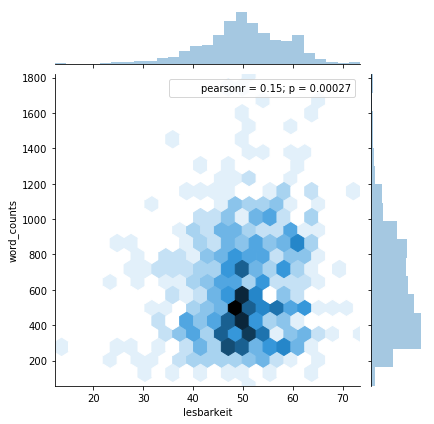

In [6]:
# joint-plot Lesbarkeit und Anzahl Wörter in Artikel
sns.jointplot(x='lesbarkeit', y='word_counts', data=df_spiegel, kind='hex')

C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


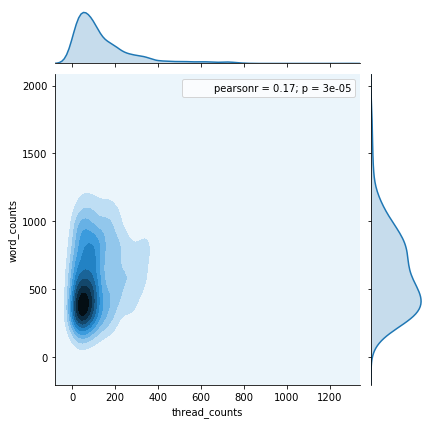

In [13]:
# joint-plot Anzahl Kommentare und Anzahl Wörter in Artikel
sns.jointplot(x='thread_counts', y='word_counts', data=df_spiegel, kind='kde')

C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


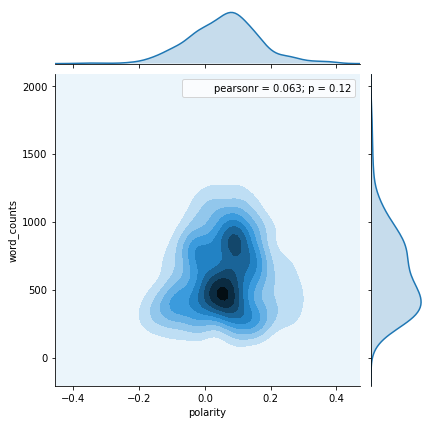

In [14]:
# joint-plot Anzahl Polarity und Anzahl Wörter in Artikel
sns.jointplot(x='polarity', y='word_counts', data=df_spiegel, kind='kde')

#### Anzahl Artikel nach Jahren

In [ ]:
df_counts = df_spiegel[['articles_counts','word_counts','thread_counts',
                        'year','month']].dropna().groupby(['month','year']).sum()
#df_counts.reset_index(inplace=True)
#ax = sns.lineplot(x='month', y='word_counts', data=df_counts)
#df_counts.plot.line(x='month',y='word_counts')

#fig = plt.figure(figsize=(15, 8))
#ax = fig.add_subplot(111)
#sns.distplot(df_counts.query('year == "2019"')['word_counts'], hist=True)

### Verteilungskurven

#### Kommentare & Anzahl Artikel

In [8]:
df_spiegel.articles_counts.sum()

625

NameError: name 'df_counts' is not defined

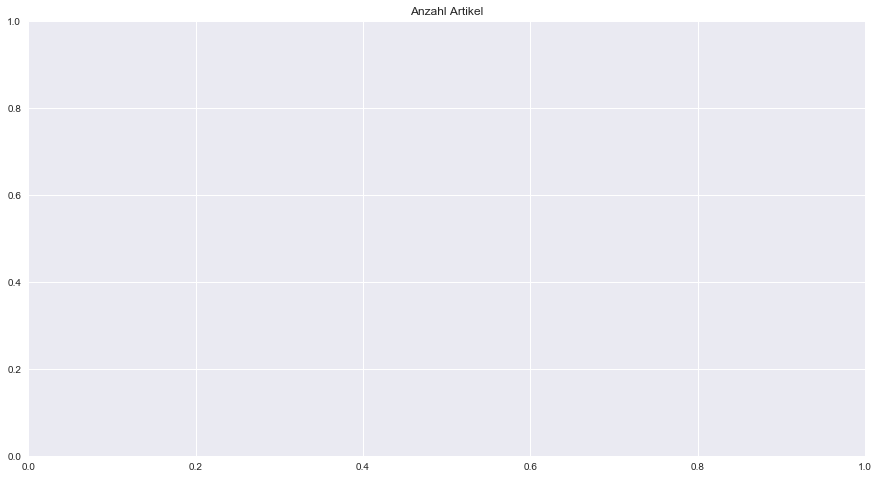

In [65]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Anzahl Artikel')
x = sns.distplot(df_counts.articles_counts, norm_hist=True, ax=ax,color='black')

C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


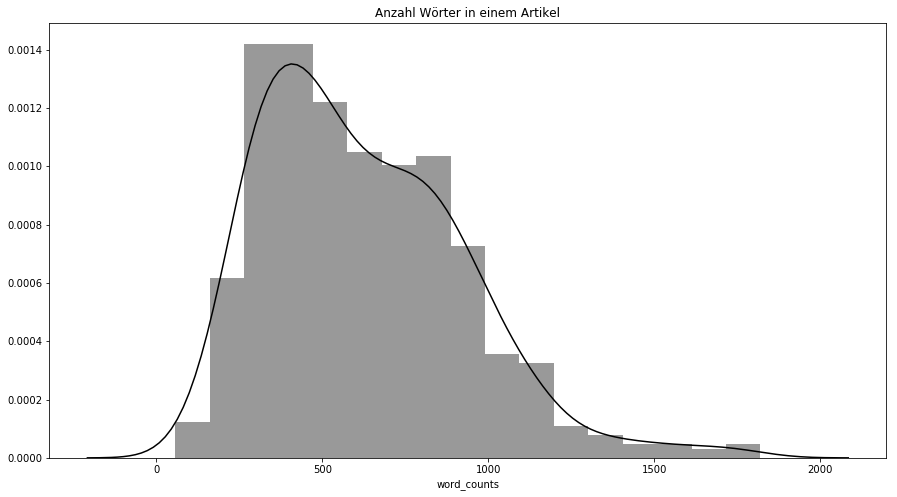

In [10]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Anzahl Wörter in einem Artikel')
x = sns.distplot(df_spiegel.word_counts, norm_hist=True, ax=ax,color='black')

C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


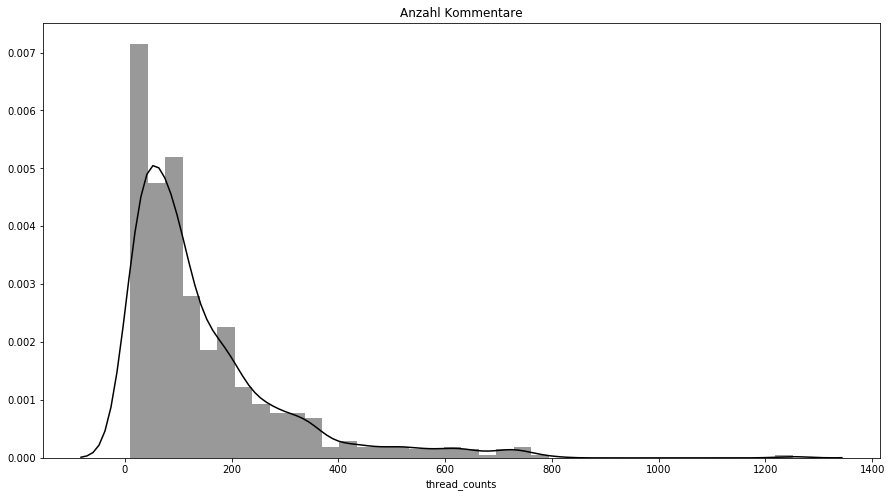

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Anzahl Kommentare')
x = sns.distplot(df_spiegel.thread_counts, norm_hist=True, ax=ax,color='black')

 Spiegel Verteilung Lesbarkeit (alle Jahre)

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Verteilung Lesbarkeit SPIEGEL')
x = sns.distplot(df_spiegel.lesbarkeit, norm_hist=True, ax=ax,color='black')

Sentimentsanalyse Spiegel (hier wäre es toll, wenn die Grafiken nebeneinander platziert werden könnten!)

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Verteilung Sentimentsanalyse_1')
x = sns.distplot(df_spiegel.polarity, norm_hist=True, ax=ax,color='black')

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.set(title='Verteilung Sentimentsanalyse_2')
x = sns.distplot(df_spiegel.subjectivity, norm_hist=True, ax=ax,color='black')

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.hist(df_bild.lesbarkeit.dropna(), bins=6,
        weights=np.zeros_like(df_bild.lesbarkeit.dropna().values) + 1. / (df_bild.lesbarkeit.dropna().values).size)

In [ ]:
ax = sns.kdeplot(df_bild.lesbarkeit.dropna(), shade=True, color="r")

In [ ]:
# Anzahl Artikel 
grouped = df_bild.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

In [ ]:
df_bild.groupby('month').word_counts.describe().unstack(1)

In [ ]:
ax = sns.boxplot(x="month", y="word_counts", data=df_bild)

### SpiegelBild

Spiegel und Bild Arikel zusammengefasst und aggregiert auf den Zeitraum 11.11 bis 19.12.2019

In [6]:
# zum Vergleich Spiegel und BILD
df_spiegel11_12 = df_spiegel.query('year==2019')\
.query('(month == 11 and day >= 12) or (month==12 and day <=19)') # Einschränkung auf den Zeitraum 11.11 bis 19.12.2019

df_bild11_12 = df_bild.query('month >=11')

In [7]:
tmp_df_spiegel = pd.DataFrame({'word_counts': df_spiegel11_12.word_counts.copy(),
                              'lesbarkeit': df_spiegel11_12.lesbarkeit.copy(),
                             'Polarity': df_spiegel11_12.polarity.copy(),
                             'subjectivity': df_spiegel11_12.subjectivity.copy()})
tmp_df_spiegel['Quelle'] ='Spiegel'
tmp_df_bild = pd.DataFrame({'word_counts': df_bild11_12.word_counts.copy(),
                           'lesbarkeit':df_bild11_12.lesbarkeit.copy(),
                           'Polarity': df_bild11_12.polarity.copy(),
                           'subjectivity': df_bild11_12.subjectivity.copy()})
tmp_df_bild['Quelle'] ='Bild'
df_spiegelbild = pd.concat([tmp_df_spiegel, tmp_df_bild])

Tabelle Vergleich Spiegel und Bild

In [64]:
df_spiegelbild.groupby('Quelle').describe().round(3)

Polarity  lesbarkeit  subjectivity  word_counts
Quelle                                                        
Bild    count    72.000      72.000        72.000       72.000
        mean      0.056      45.510         0.118      329.431
        std       0.245      13.386         0.178      231.871
        min      -0.500       5.300         0.000       26.000
        25%      -0.084      36.900         0.014      140.250
        50%       0.048      44.955         0.059      301.500
        75%       0.172      53.717         0.125      469.000
        max       1.000      72.530         1.000     1037.000
Spiegel count    53.000      53.000        53.000       53.000
        mean      0.040      49.853         0.082      599.208
        std       0.104       8.004         0.064      293.330
        min      -0.184      29.320         0.000       57.000
        25%      -0.040      45.590         0.040      378.000
        50%       0.048      50.160         0.079      509.000
        75%       0.103      54.320         0.111      815.000
        max       0.260      64.000         0.333     1342.000

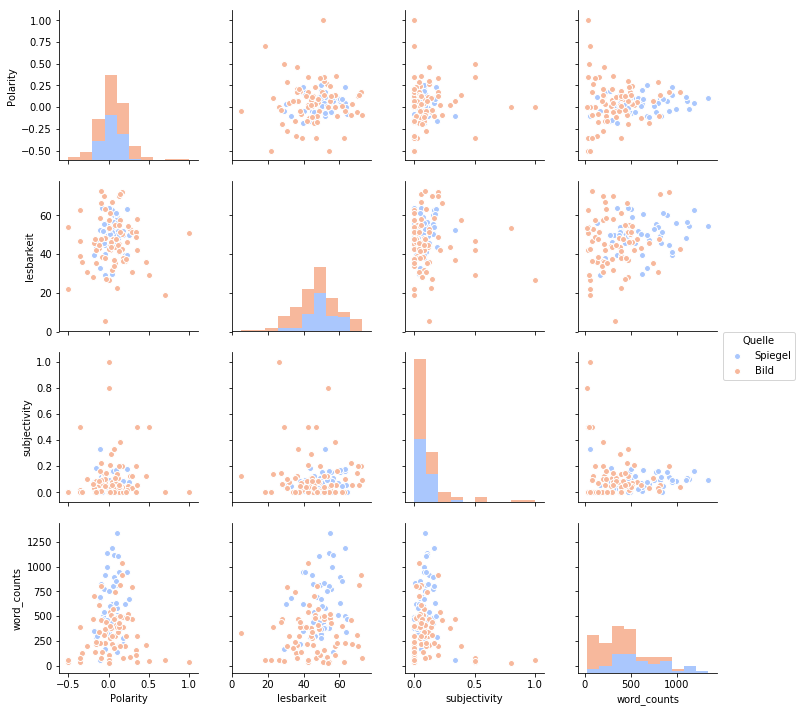

In [24]:
sns.pairplot(df_spiegelbild, hue='Quelle', palette='coolwarm')

Violine Plots

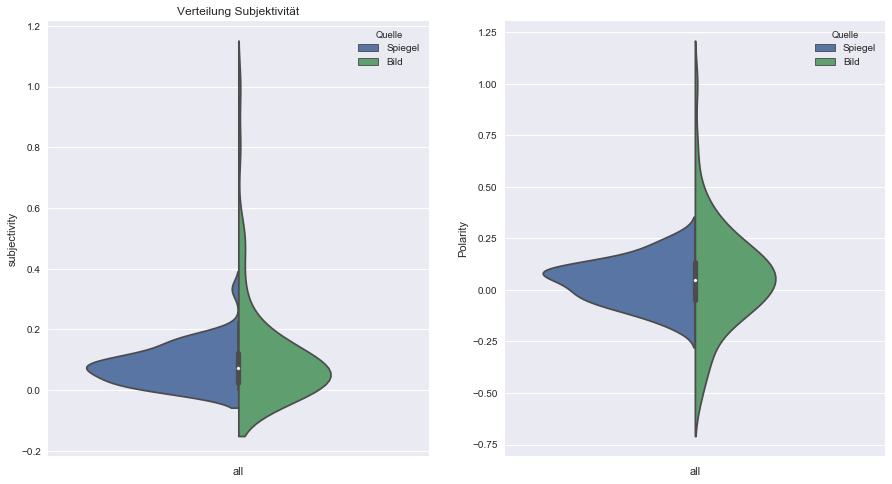

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x="all", y="subjectivity", hue="Quelle", data=df_spiegelbild, 
               ax=axes[0], split=True).set_title('Verteilung Subjektivität')
sns.violinplot(x="all", y="Polarity", hue="Quelle", data=df_spiegelbild, ax=axes[1], split=True)

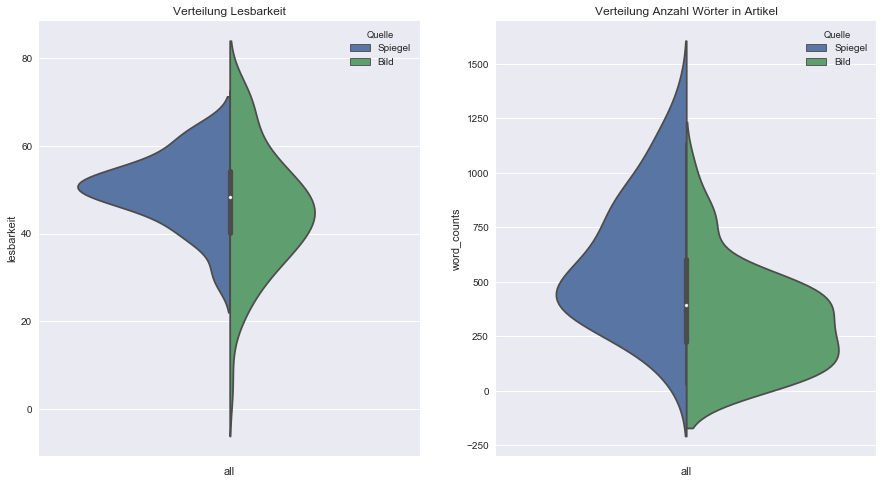

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x="all", y="lesbarkeit", hue="Quelle", data=df_spiegelbild, 
               ax=axes[0], split=True).set_title('Verteilung Lesbarkeit')
sns.violinplot(x="all", y="word_counts", hue="Quelle", 
               data=df_spiegelbild, ax=axes[1], split=True).set_title('Verteilung Anzahl Wörter in Artikel')

C:\Users\Stefan Kostelecky\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


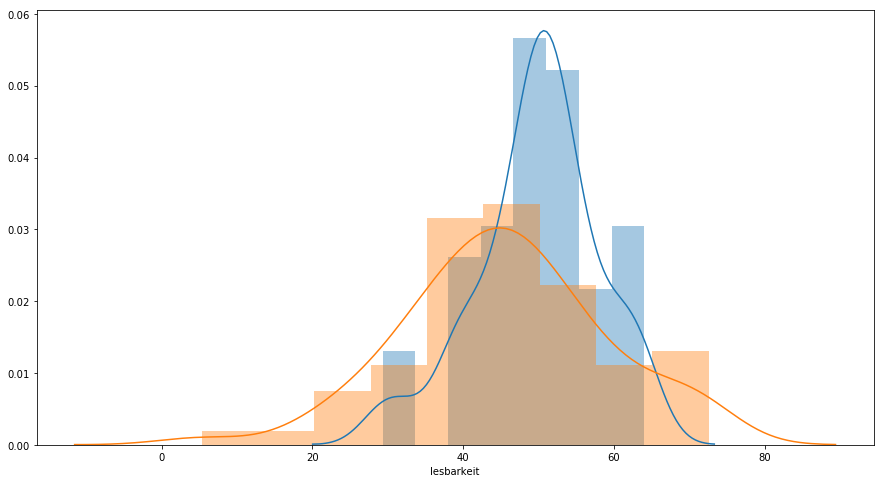

In [30]:
#verlgeichen mit Lesbarkeit
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.distplot(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'], hist=True, ax=ax)
sns.distplot(df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'], hist=True, ax=ax)


### Statistik Tests

In [32]:
help(stats.mannwhitneyu)

Help on function mannwhitneyu in module scipy.stats.stats:

mannwhitneyu(x, y, use_continuity=True, alternative=None)
    Computes the Mann-Whitney rank test on samples x and y.
    
    Parameters
    ----------
    x, y : array_like
        Array of samples, should be one-dimensional.
    use_continuity : bool, optional
            Whether a continuity correction (1/2.) should be taken into
            account. Default is True.
    alternative : None (deprecated), 'less', 'two-sided', or 'greater'
            Whether to get the p-value for the one-sided hypothesis ('less'
            or 'greater') or for the two-sided hypothesis ('two-sided').
            Defaults to None, which results in a p-value half the size of
            the 'two-sided' p-value and a different U statistic. The
            default behavior is not the same as using 'less' or 'greater':
            it only exists for backward compatibility and is deprecated.
    
    Returns
    -------
    statistic : float
    

In [24]:
import scipy.stats as stats

stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                   df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

In [48]:
col_names = list(df_spiegelbild.columns)[:-2]

liste_ttest = []
liste_mann = []
for x in col_names:
    liste_ttest.append(stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                    df_spiegelbild.query('Quelle == "Bild"')[x].values))
    
    liste_mann.append(stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                   df_spiegelbild.query('Quelle == "Bild"')[x].values))

    

In [59]:
df_stat_test = pd.DataFrame({'var_name':col_names,
                            'ttest_statistik':np.array(liste_ttest)[:,0],
                            'ttest_pvalue':np.array(liste_ttest)[:,1],
                            'mann_statistik':np.array(liste_mann)[:,0],
                            'mann_pvalue':np.array(liste_mann)[:,1]})

In [63]:
df_stat_test.set_index(['var_name']).round(3)

,mann_pvalue,mann_statistik,ttest_pvalue,ttest_statistik
var_name,,,,
Polarity,0.336,1823.0,0.648,-0.458
lesbarkeit,0.007,1418.5,0.038,2.101
subjectivity,0.344,1827.5,0.158,-1.419
word_counts,0.000,895.0,0.000,5.741
